#SpatialzOSM example for the city of Halifax, Canada

This notebook describes how to use SpatialzOSM, using the Halifax (Canada) as an example

First, we install the necessary packages.
SpatialzOSM requires OSMnx, so we isntall it

In [1]:
!pip install OSMnx
!pip install gdal geopandas matplotlib networkx numpy pandas rasterio requests scipy shapely python==3.11.*
!pip install git+https://github.com/bladitoaza/spatialzosm.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 2.8 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement python==3.11.* (from versions: none)
ERROR: No matching distribution found for python==3.11.*
  Cloning https://github.com/bladitoaza/spatialzosm.git to /tmp/pip-req-build-obr6_qac
  Running command git clone --filter=blob:none --quiet https://github.com/bladitoaza/spatialzosm.git /tmp/pip-req-build-obr6_qac
  Resolved https://github.com/bladitoaza/spatialzosm.git to commit 6a4375c83e8003278600bd2e494d8a57d090a158
  Preparing metadata (setup.py) ... done
  Created wheel for spatialzosm: filename=spatialzosm-0.1-py3-none-any.whl size=11133 sha256=bae4f3ad25cfea5384bbb4480aeb80e5249ff423b48b48fdbbb530016dc96e06
  Stored in directory: /tmp/pip-ephem-wheel-cache-suclajy9/wheels/2c/cd/ba/4e435e2c41f0a11f4878c202d21ec2291032725b9e08bb3fae
Successfully built spatialzosm


# Extracting points of interests

Now, we import the necessary packages:
spatialzosm
and data: spatialzOSM-examples

In [2]:
import sys
import geopandas as gpd
from spatialzosm.spatialize import Osmpoi
import os
if not os.path.exists('/content/spatialzOSM-examples'):
  !git clone https://github.com/bladitoaza/spatialzOSM-examples
  print("Github data cloned")

Cloning into 'spatialzOSM-examples'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 61 (delta 20), reused 6 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (61/61), 1.91 MiB | 3.59 MiB/s, done.
Resolving deltas: 100% (20/20), done.
Github data cloned


Create an object of the class Osmpoi and initialize the parameters of the object

In [3]:
halifax = Osmpoi({
    "city": "Halifax",
    "country": "Canada",
})
halifax.file_export='Halifax_POIs'
halifax.save_raw=True

You can extract the points of interest using `fetch_osm_points()`. A raw dataset of the points of interest will be retrieved

In [12]:
halifax_pois = halifax.fetch_osm_points()

Obtaining POIs from OSM for {'city': 'Halifax', 'country': 'Canada'}. It can take a few minutes...
Raw OSM POIs obtained successfully. File saved as Halifax_POIs_raw.csv


The raw dataset can be cleaned and automatically filtered using `filter_osm_points() `

In [13]:
osmdata = halifax.filter_osm_points(halifax_pois)

Filtering, cleaning and rearranging POIs for {'city': 'Halifax', 'country': 'Canada'}.
 It can take a few minutes...
OSM POIs cleaned successfully. File saved as Halifax_POIs_clean.csv


Now we have a dataset of the points of interest in Halifax

# Generating home locations

We read the geospatial dataset about Halifax containing the information of its zone units (ZUs), which in this case are called **dissemination areas**, and the population counts of each ZU. The input dataset is **Census_2021_dissemination_Areas_Halifax.gpkg**

In [4]:
gdf = gpd.read_file('/content/spatialzOSM-examples/Halifax/input_data/Census_2021_Dissemination_Areas_Halifax.gpkg',
                    crs='EPSG:4326')
gdf.head()

/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:198: RuntimeWarning: driver GPKG does not support open option CRS
  return ogr_read(


,DAUID,DAPOP2021,DATDWELL20,DAURDWELL2,DAAREA,DAPOPDEN,DAIR2021,DARPLAT,DARPLONG,PRUID,...,CMAUID,CMANAME,CMATYPE,CMAPUID,CTUID,CTNAME,ADAUID,SACCODE,SACTYPE,geometry
0,12090103,680,299,293,0.3275,2076.3,0,44.724863,-63.686238,12,...,205,Halifax,B,12205,2050123.05,0123.05,12090064,205,1,"MULTIPOLYGON (((-7088894.186 5578516.598, -708..."
1,12090104,230,83,83,0.0988,2327.9,0,44.725395,-63.681198,12,...,205,Halifax,B,12205,2050123.06,0123.06,12090024,205,1,"MULTIPOLYGON (((-7088781.32 5578416.836, -7088..."
2,12090105,601,249,242,0.1987,3024.7,0,44.720087,-63.682896,12,...,205,Halifax,B,12205,2050123.06,0123.06,12090024,205,1,"MULTIPOLYGON (((-7088614.783 5577931.468, -708..."
3,12090106,270,99,96,0.0467,5781.6,0,44.721065,-63.680940,12,...,205,Halifax,B,12205,2050123.06,0123.06,12090024,205,1,"MULTIPOLYGON (((-7089051.08 5577673.793, -7089..."
4,12090108,621,191,184,0.2925,2123.1,0,44.711760,-63.689055,12,...,205,Halifax,B,12205,2050123.06,0123.06,12090024,205,1,"MULTIPOLYGON (((-7090122.84 5575917.84, -70900..."


We rename the columns by giving an appropriate name

In [5]:
new_ind = 'AZ'
gdf.rename(columns={'DAPOP2021':'pop','DAUID':new_ind}, inplace=True)
gdf.set_index('AZ',inplace = True)
gdf.head()

,pop,DATDWELL20,DAURDWELL2,DAAREA,DAPOPDEN,DAIR2021,DARPLAT,DARPLONG,PRUID,PRNAME,...,CMAUID,CMANAME,CMATYPE,CMAPUID,CTUID,CTNAME,ADAUID,SACCODE,SACTYPE,geometry
AZ,,,,,,,,,,,,,,,,,,,,,
12090103,680,299,293,0.3275,2076.3,0,44.724863,-63.686238,12,Nova Scotia / Nouvelle-Écosse,...,205,Halifax,B,12205,2050123.05,0123.05,12090064,205,1,"MULTIPOLYGON (((-7088894.186 5578516.598, -708..."
12090104,230,83,83,0.0988,2327.9,0,44.725395,-63.681198,12,Nova Scotia / Nouvelle-Écosse,...,205,Halifax,B,12205,2050123.06,0123.06,12090024,205,1,"MULTIPOLYGON (((-7088781.32 5578416.836, -7088..."
12090105,601,249,242,0.1987,3024.7,0,44.720087,-63.682896,12,Nova Scotia / Nouvelle-Écosse,...,205,Halifax,B,12205,2050123.06,0123.06,12090024,205,1,"MULTIPOLYGON (((-7088614.783 5577931.468, -708..."
12090106,270,99,96,0.0467,5781.6,0,44.721065,-63.680940,12,Nova Scotia / Nouvelle-Écosse,...,205,Halifax,B,12205,2050123.06,0123.06,12090024,205,1,"MULTIPOLYGON (((-7089051.08 5577673.793, -7089..."
12090108,621,191,184,0.2925,2123.1,0,44.711760,-63.689055,12,Nova Scotia / Nouvelle-Écosse,...,205,Halifax,B,12205,2050123.06,0123.06,12090024,205,1,"MULTIPOLYGON (((-7090122.84 5575917.84, -70900..."


## Generating locations over the zone units

We generate the locations across the areas of the ZUs uniformly

In [10]:
POIs_area_uniform= halifax.create_houses_areas(gdf,method='uniform',pop_size=gdf['pop'].values,crs='EPSG:4326')

Sampling points on areas...
Sampling completed. Coordinates saved to disk for method uniform


We can also generate the locations across the areas of the ZUs using a normal distribution around a center point. The center points are the centroids of the ZUs shapes

In [11]:
POIs_area_normal= halifax.create_houses_areas(gdf,method='normal',pop_size=gdf['pop'].values,crs='EPSG:4326')

Sampling points on areas...
Sampling completed. Coordinates saved to disk for method normal


## Generating home locations along the street network

To generate home locations along the road network, we need the geospatial information of the road network.
We can extract the road network from OSM using:

In [14]:
street_network = halifax.fetch_osm_streets()

Obtaining street network from OSM for {'city': 'Halifax', 'country': 'Canada'}. It can take a few minutes...
OSM streets obtained successfully. File saved as Halifax_POIs_streets.csv


The datafile is saved or stored as a variable

Next, we load the extracted road network from file

/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:198: RuntimeWarning: driver CSV does not support open option CRS
  return ogr_read(


<Axes: >

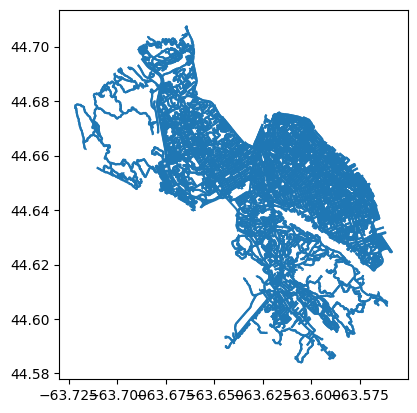

In [30]:
gdf_streets = gpd.read_file('Halifax_POIs_streets.csv',GEOM_POSSIBLE_NAMES="geometry",
                            KEEP_GEOM_COLUMNS="NO", crs='EPSG:4326')
gdf_streets=gdf_streets.set_crs(epsg=4326, allow_override=True)
gdf_streets.plot()

Join both datasets `gdf_streets` and `gdf` to have a dataset of the road newtork with the associated zone unit each road belongs to

In [31]:
gdf_streets=gdf_streets.to_crs(epsg=3857)
roads_region=gpd.sjoin(gdf_streets, gdf,how="inner",predicate='intersects')
roads_region.rename(columns={"index_right": new_ind},inplace=True)
pop_size = gdf.loc[roads_region[new_ind].unique()]

We generate home locations along the road network using the road network `roads_region` and the population of each zone unit `pop_size[pop]`

In [33]:
POI_houses = halifax.create_houses_streets(roads_region,pop_size=pop_size['pop'],crs='EPSG:4326')

/usr/local/lib/python3.12/dist-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.12/dist-packages/spatialzosm/spatialize.py:324: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gdk= gdf.groupby([index_col,'highway'])
/usr/local/lib/python3.12/dist-packages/spatialzosm/spatialize.py:351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

Calculating random number of points per street type...
Calculating number of points per street...
Sampling points on streets...
Sampling completed. Coordinates saved to disk.


## Generating home locations within building geometries

To generate home locations along the road network, we need the geospatial information of the building shapes.
We can extract the road network from OSM using:

In [6]:
buildings=halifax.fetch_osm_buildings()

Obtaining buildings from OSM for {'city': 'Halifax', 'country': 'Canada'}. It can take a few minutes...
Filtering, cleaning and rearranging buildings for {'city': 'Halifax', 'country': 'Canada'}.
 It can take a few minutes...
OSM buildings obtained successfully. File saved as Halifax_POIs_buildings.csv


We read the obtained dataset

In [7]:
gdf_building = gpd.read_file('Halifax_POIs_buildings.csv',GEOM_POSSIBLE_NAMES="geometry", KEEP_GEOM_COLUMNS="NO", crs='EPSG:4326')
gdf_building=gdf_building.set_crs(epsg=4326, allow_override=True)

/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:198: RuntimeWarning: driver CSV does not support open option CRS
  return ogr_read(


We filter the dataset to obtain only buildings that can allocate homes

In [8]:
gdf_building['building']=gdf_building['building'].astype(str)
gdf_building=gdf_building[(gdf_building['building']=='yes') | (gdf_building['building']=='hotel')| (gdf_building['building']=='apartment')| (gdf_building['building']=='apartments')| (gdf_building['building']=='bungalow')| (gdf_building['building']=='cabin')| (gdf_building['building']=='dormitory')| (gdf_building['building']=='flats')| (gdf_building['building']=='house')|  (gdf_building['building']=='residential')| (gdf_building['building']=='boathouse')| (gdf_building['building']=='allotment_house')| (gdf_building['building']=='terrace')| (gdf_building['building']=='transformer_house')| (gdf_building['building']=='summer_house')| (gdf_building['building']=='houseboat')| (gdf_building['building']=='terrace')]
gdf_building=gdf_building[['building','geometry']]

Join both datasets `gdf_building` and `gdf` to have a dataset of the road newtork with the associated zone unit each road belongs to

In [9]:
gdf_building=gdf_building.to_crs(epsg=3857)
buildings_region=gpd.sjoin(gdf_building, gdf,how="left",predicate='within')
buildings_region.rename(columns={"index_right": new_ind},inplace=True)
buildings_region=buildings_region.dropna(subset=new_ind)
pop_size = gdf.loc[buildings_region[new_ind].unique()]

Generate the locations within the buildings. The generation is based on the types of buildings in **building** column of `buildings_region`

In [10]:
building_type_column = 'building'
POI_houses = halifax.create_houses_buildings(buildings_region,pop_size=pop_size['pop'],index_column=new_ind,building_column=building_type_column,crs='EPSG:4326')

Calculating number of points per building...
Sampling points on buildings...
Sampling completed. Coordinates saved to disk.
